### Thursday, January 4, 2024

[Text-to-image](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)

This notebook was created from the above HuggingFace Diffusers documentation page. This page includes a Colab link which lacks all of the page content, so it was manually reproduced here. 

docker container start hfpt_Dec14

With the exception of a single cell towards the end of the notebook, this all runs.

### Text-to-image

When you think of diffusion models, text-to-image is usually one of the first things that come to mind. Text-to-image generates an image from a text description (for example, “Astronaut in a jungle, cold color palette, muted colors, detailed, 8k”) which is also known as a prompt.

From a very high level, a diffusion model takes a prompt and some random initial noise, and iteratively removes the noise to construct an image. The denoising process is guided by the prompt, and once the denoising process ends after a predetermined number of time steps, the image representation is decoded into an image.

Read the [How does Stable Diffusion work?](https://huggingface.co/blog/stable_diffusion#how-does-stable-diffusion-work) blog post to learn more about how a latent diffusion model works.

You can generate images from a prompt in 🤗 Diffusers in two steps:

1) Load a checkpoint into the [AutoPipelineForText2Image](https://huggingface.co/docs/diffusers/v0.25.0/en/api/pipelines/auto_pipeline#diffusers.AutoPipelineForText2Image) class, which automatically detects the appropriate pipeline class to use based on the checkpoint:

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


2) Pass a prompt to the pipeline to generate an image:

  0%|          | 0/50 [00:00<?, ?it/s]

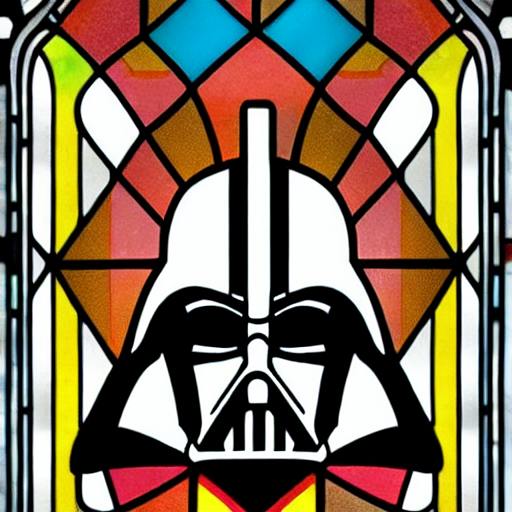

In [2]:
image = pipeline(
	"stained glass of darth vader, backlight, centered composition, masterpiece, photorealistic, 8k"
).images[0]
image

# 3.2s

### Popular Models

The most common text-to-image models are [Stable Diffusion v1.5](https://huggingface.co/runwayml/stable-diffusion-v1-5), [Stable Diffusion XL (SDXL)](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0), and [Kandinsky 2.2](https://huggingface.co/kandinsky-community/kandinsky-2-2-decoder). There are also ControlNet models or adapters that can be used with text-to-image models for more direct control in generating images. The results from each model are slightly different because of their architecture and training process, but no matter which model you choose, their usage is more or less the same. Let’s use the same prompt for each model and compare their results.

#### Stable Diffusion v1.5

[Stable Diffusion v1.5](https://huggingface.co/runwayml/stable-diffusion-v1-5) is a latent diffusion model initialized from [Stable Diffusion v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4), and finetuned for 595K steps on 512x512 images from the LAION-Aesthetics V2 dataset. You can use this model like:

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

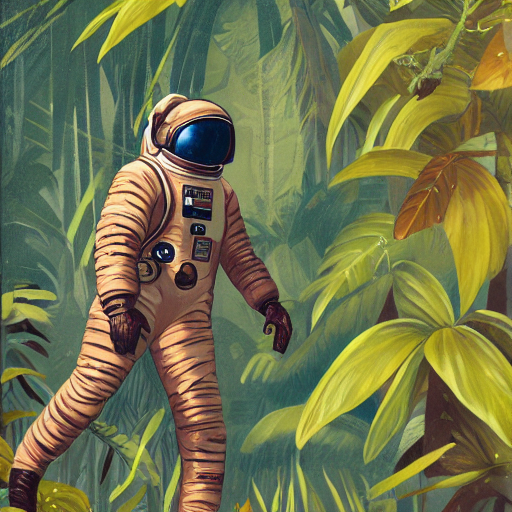

In [3]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image

#### Stable Diffusion XL

SDXL is a much larger version of the previous Stable Diffusion models, and involves a two-stage model process that adds even more details to an image. It also includes some additional micro-conditionings to generate high-quality images centered subjects. Take a look at the more comprehensive [SDXL guide](https://huggingface.co/docs/diffusers/using-diffusers/sdxl) to learn more about how to use it. In general, you can use SDXL like:

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

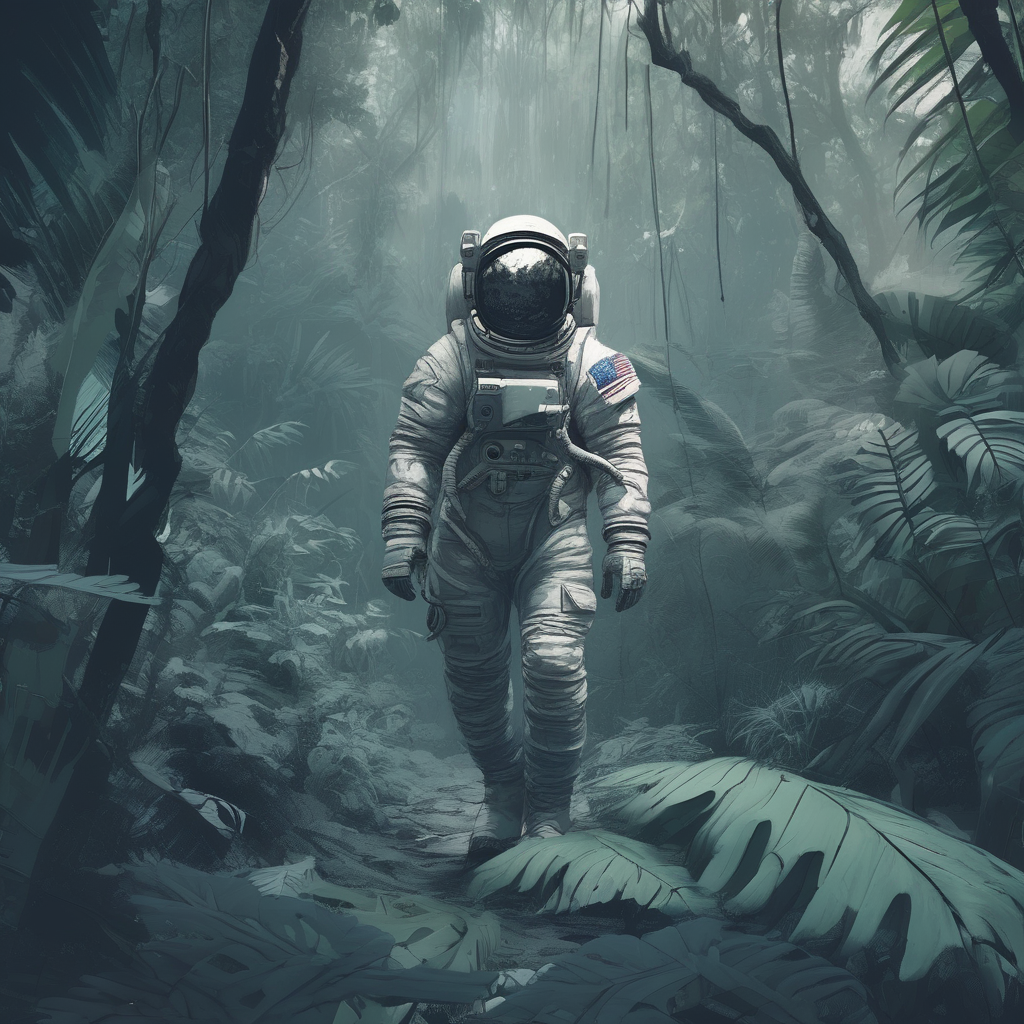

In [4]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16"
).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image

In [5]:
!ls /root/.cache/huggingface/hub


models--CompVis--stable-diffusion-v1-4
models--TheBloke--CodeLlama-34B-Instruct-GPTQ
models--TheBloke--Llama-2-13b-Chat-GPTQ
models--anton-l--ddpm-butterflies-128
models--google--ddpm-cat-256
models--google--ddpm-celebahq-256
models--google--ddpm-church-256
models--kandinsky-community--kandinsky-2-2-decoder
models--kandinsky-community--kandinsky-2-2-prior
models--kohbanye--pixel-art-style
models--microsoft--Orca-2-13b
models--mistralai--Mistral-7B-Instruct-v0.2
models--nitrosocke--Ghibli-Diffusion
models--ogkalu--Comic-Diffusion
models--runwayml--stable-diffusion-v1-5
models--stabilityai--sd-vae-ft-mse
models--stabilityai--sd-x2-latent-upscaler
models--stabilityai--stable-diffusion-xl-base-1.0
models--stabilityai--stable-diffusion-xl-refiner-1.0
tmplfhsdhsz
tmpnhzefb_1
tmpqyiqy8vy
tmpt0cjd006
tmpw_a6f9l2
version.txt
version_diffusers_cache.txt


In [ ]:
# docker cp c8324b70601d:///root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-xl-refiner-1.0 /home/rob/Data3/huggingface/transformers
# Successfully copied 6.24GB to /home/rob/Data3/huggingface/transformers

#### Kandinsky 2.2

The Kandinsky model is a bit different from the Stable Diffusion models because it also uses an image prior model to create embeddings that are used to better align text and images in the diffusion model.

The easiest way to use Kandinsky 2.2 is:

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2.py:202: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/100 [00:00<?, ?it/s]

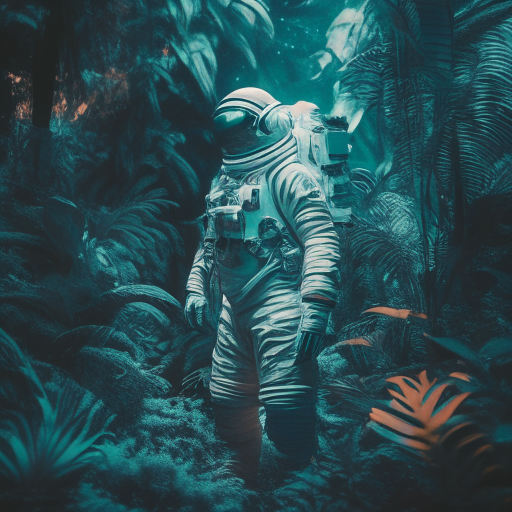

In [6]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16
).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image

#### ControlNet

ControlNet models are auxiliary models or adapters that are finetuned on top of text-to-image models, such as Stable Diffusion v1.5. Using ControlNet models in combination with text-to-image models offers diverse options for more explicit control over how to generate an image. With ControlNet, you add an additional conditioning input image to the model. For example, if you provide an image of a human pose (usually represented as multiple keypoints that are connected into a skeleton) as a conditioning input, the model generates an image that follows the pose of the image. Check out the more in-depth ControlNet guide to learn more about other conditioning inputs and how to use them.

In this example, let’s condition the ControlNet with a human pose estimation image. Load the ControlNet model pretrained on human pose estimations:

In [7]:
from diffusers import ControlNetModel, AutoPipelineForText2Image
from diffusers.utils import load_image
import torch

controlnet = ControlNetModel.from_pretrained(
	"lllyasviel/control_v11p_sd15_openpose", torch_dtype=torch.float16, variant="fp16"
).to("cuda")
pose_image = load_image("https://huggingface.co/lllyasviel/control_v11p_sd15_openpose/resolve/main/images/control.png")

# 10m 25.1s

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/723M [00:00<?, ?B/s]

In [8]:
!ls /root/.cache/huggingface/hub

models--CompVis--stable-diffusion-v1-4
models--TheBloke--CodeLlama-34B-Instruct-GPTQ
models--TheBloke--Llama-2-13b-Chat-GPTQ
models--anton-l--ddpm-butterflies-128
models--google--ddpm-cat-256
models--google--ddpm-celebahq-256
models--google--ddpm-church-256
models--kandinsky-community--kandinsky-2-2-decoder
models--kandinsky-community--kandinsky-2-2-prior
models--kohbanye--pixel-art-style
models--lllyasviel--control_v11p_sd15_openpose
models--microsoft--Orca-2-13b
models--mistralai--Mistral-7B-Instruct-v0.2
models--nitrosocke--Ghibli-Diffusion
models--ogkalu--Comic-Diffusion
models--runwayml--stable-diffusion-v1-5
models--stabilityai--sd-vae-ft-mse
models--stabilityai--sd-x2-latent-upscaler
models--stabilityai--stable-diffusion-xl-base-1.0
models--stabilityai--stable-diffusion-xl-refiner-1.0
tmplfhsdhsz
tmpnhzefb_1
tmpqyiqy8vy
tmpt0cjd006
tmpw_a6f9l2
version.txt
version_diffusers_cache.txt


In [ ]:
# docker cp c8324b70601d:///root/.cache/huggingface/hub/models--lllyasviel--control_v11p_sd15_openpose /home/rob/Data3/huggingface/transformers
# Successfully copied 723MB to /home/rob/Data3/huggingface/transformers

Pass the controlnet to the [AutoPipelineForText2Image](https://huggingface.co/docs/diffusers/v0.25.0/en/api/pipelines/auto_pipeline#diffusers.AutoPipelineForText2Image), and provide the prompt and pose estimation image:

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

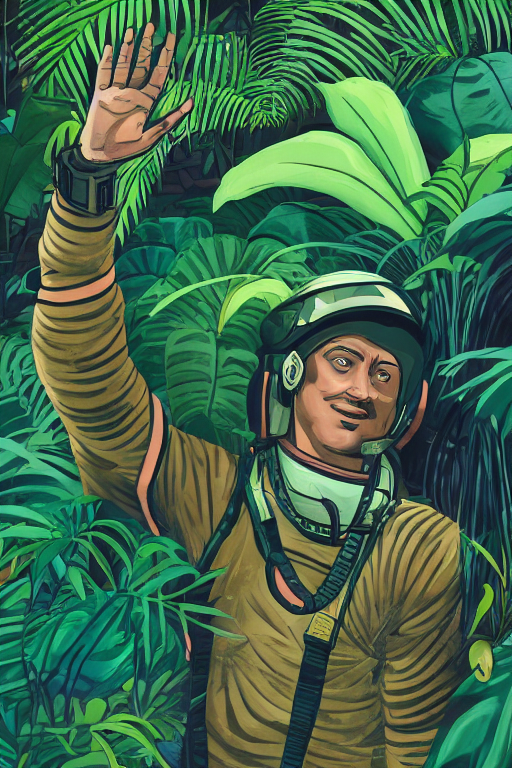

In [9]:
pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, variant="fp16"
).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", image=pose_image, generator=generator).images[0]
image

#### Configure pipeline parameters

There are a number of parameters that can be configured in the pipeline that affect how an image is generated. You can change the image’s output size, specify a negative prompt to improve image quality, and more. This section dives deeper into how to use these parameters.

##### Height and width

The height and width parameters control the height and width (in pixels) of the generated image. By default, the Stable Diffusion v1.5 model outputs 512x512 images, but you can change this to any size that is a multiple of 8. For example, to create a rectangular image:

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

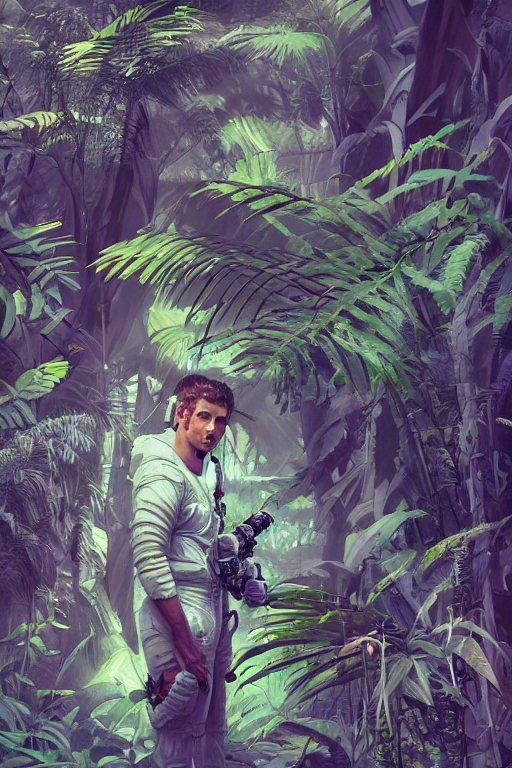

In [10]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")
image = pipeline(
	"Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", height=768, width=512
).images[0]
image

Other models may have different default image sizes depending on the image sizes in the training dataset. For example, SDXL’s default image size is 1024x1024 and using lower height and width values may result in lower quality images. Make sure you check the model’s API reference first!

##### Guidance Scale

The guidance_scale parameter affects how much the prompt influences image generation. A lower value gives the model “creativity” to generate images that are more loosely related to the prompt. Higher guidance_scale values push the model to follow the prompt more closely, and if this value is too high, you may observe some artifacts in the generated image.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

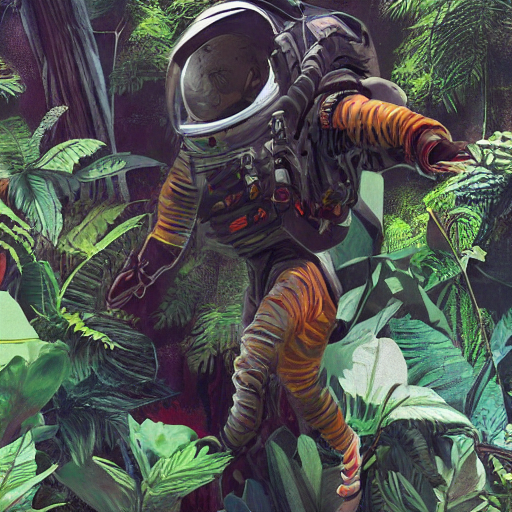

In [11]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")
image = pipeline(
	"Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", guidance_scale=3.5
).images[0]
image

##### Negative prompt

Just like how a prompt guides generation, a negative prompt steers the model away from things you don’t want the model to generate. This is commonly used to improve overall image quality by removing poor or bad image features such as “low resolution” or “bad details”. You can also use a negative prompt to remove or modify the content and style of an image.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

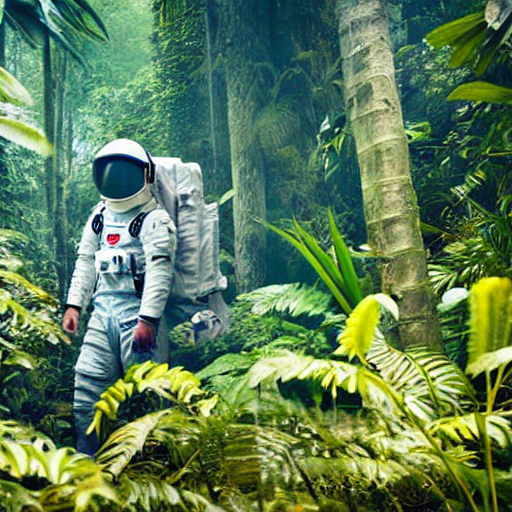

In [12]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")
image = pipeline(
	prompt="Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
	negative_prompt="ugly, deformed, disfigured, poor details, bad anatomy",
).images[0]
image

##### Generator

A [torch.Generator](https://pytorch.org/docs/stable/generated/torch.Generator.html#generator) object enables reproducibility in a pipeline by setting a manual seed. You can use a Generator to generate batches of images and iteratively improve on an image generated from a seed as detailed in the Improve [image quality with deterministic generation guide](https://huggingface.co/docs/diffusers/using-diffusers/reusing_seeds).

You can set a seed and Generator as shown below. Creating an image with a Generator should return the same result each time instead of randomly generating a new image.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

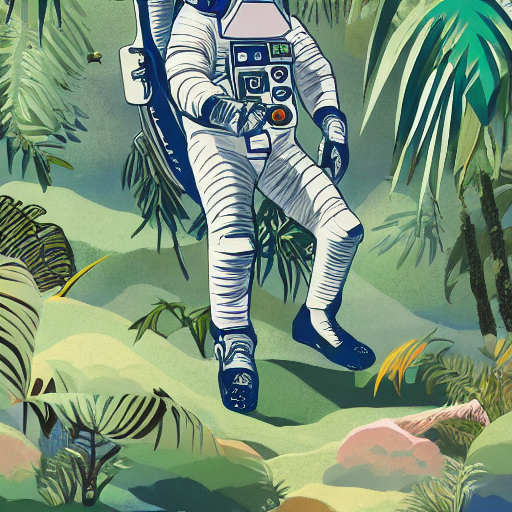

In [13]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")
generator = torch.Generator(device="cuda").manual_seed(30)
image = pipeline(
	"Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
	generator=generator,
).images[0]
image

##### Control image generation

There are several ways to exert more control over how an image is generated outside of configuring a pipeline’s parameters, such as prompt weighting and ControlNet models.

##### Prompt weighting

Prompt weighting is a technique for increasing or decreasing the importance of concepts in a prompt to emphasize or minimize certain features in an image. We recommend using the Compel library to help you generate the weighted prompt embeddings.



Learn how to create the prompt embeddings in the [Prompt weighting guide](https://huggingface.co/docs/diffusers/using-diffusers/weighted_prompts). This example focuses on how to use the prompt embeddings in the pipeline.

Once you’ve created the embeddings, you can pass them to the prompt_embeds (and negative_prompt_embeds if you’re using a negative prompt) parameter in the pipeline.

In [14]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")
image = pipeline(
	prompt_embeds=prompt_embeds, # generated from Compel
	negative_prompt_embeds=negative_prompt_embeds, # generated from Compel
).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


NameError: name 'prompt_embeds' is not defined

##### ControlNet

As you saw in the ControlNet section, these models offer a more flexible and accurate way to generate images by incorporating an additional conditioning image input. Each ControlNet model is pretrained on a particular type of conditioning image to generate new images that resemble it. For example, if you take a ControlNet model pretrained on depth maps, you can give the model a depth map as a conditioning input and it’ll generate an image that preserves the spatial information in it. This is quicker and easier than specifying the depth information in a prompt. You can even combine multiple conditioning inputs with a [MultiControlNet](https://huggingface.co/docs/diffusers/using-diffusers/controlnet#multicontrolnet)!

There are many types of conditioning inputs you can use, and 🤗 Diffusers supports ControlNet for Stable Diffusion and SDXL models. Take a look at the more comprehensive [ControlNet](https://huggingface.co/docs/diffusers/using-diffusers/controlnet) guide to learn how you can use these models.

##### Optimize

Diffusion models are large, and the iterative nature of denoising an image is computationally expensive and intensive. But this doesn’t mean you need access to powerful - or even many - GPUs to use them. There are many optimization techniques for running diffusion models on consumer and free-tier resources. For example, you can load model weights in half-precision to save GPU memory and increase speed or offload the entire model to the GPU to save even more memory.

PyTorch 2.0 also supports a more memory-efficient attention mechanism called [scaled dot product attention](https://huggingface.co/docs/diffusers/optimization/torch2.0#scaled-dot-product-attention) that is automatically enabled if you’re using PyTorch 2.0. You can combine this with [torch.compile](https://pytorch.org/tutorials/intermediate/torch_compile_tutorial.html) to speed your code up even more:

In [15]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")
pipeline.unet = torch.compile(pipeline.unet, mode="reduce-overhead", fullgraph=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


For more tips on how to optimize your code to save memory and speed up inference, read the [Memory and speed](https://huggingface.co/docs/diffusers/optimization/fp16) and [Torch 2.0](https://huggingface.co/docs/diffusers/optimization/torch2.0) guides.